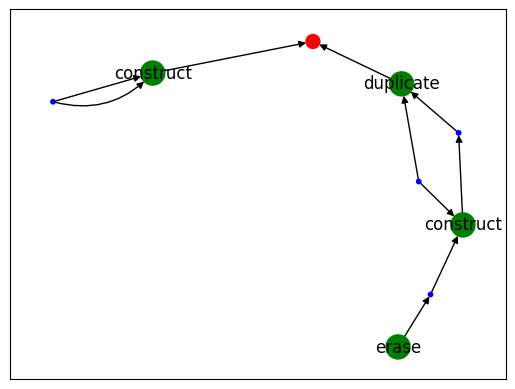

In [31]:
import networkx as nx
from inet import *
inet = nx.MultiDiGraph()
u = inet_add_construct(inet)
v = inet_add_duplicate(inet)
w = inet_add_construct(inet)
e = inet_add_erase(inet)
active = inet_connect_ports(inet, (u, 0), (v, 0))
inet_connect_ports(inet, (u, 1), (u, 2))
inet_connect_ports(inet, (v, 1), (w, 1))
inet_connect_ports(inet, (v, 2), (w, 0))
inet_connect_ports(inet, (e, 0), (w, 2))
inet_draw(inet)

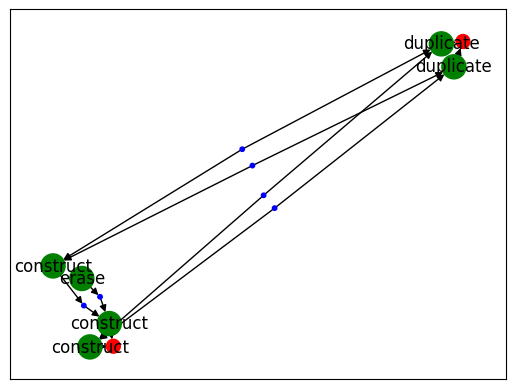

In [32]:
rule = inet_condup_rewrite_rule(inet, active)
# nx.draw_networkx(rule[2])
inet_rewrite(inet, rule)
# commute_construct_duplicate(inet)
inet_draw(inet)

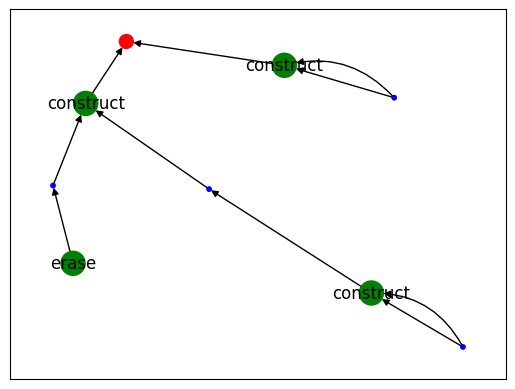

In [33]:
annihilate_concon_or_dupdup(inet)
inet_draw(inet)

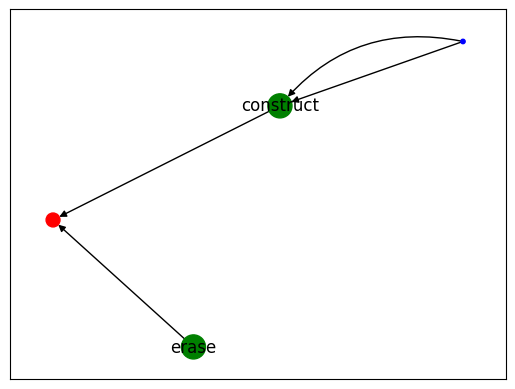

In [34]:
annihilate_concon_or_dupdup(inet)
inet_draw(inet)

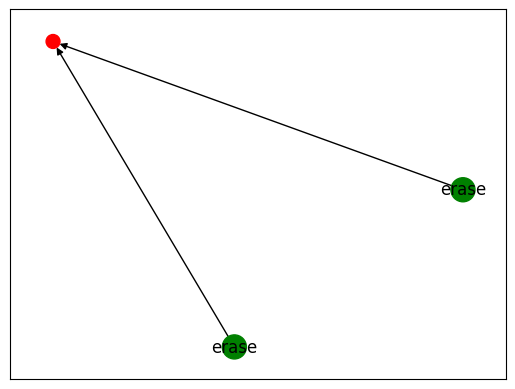

In [35]:
commute_condup_erase(inet)
inet_draw(inet)

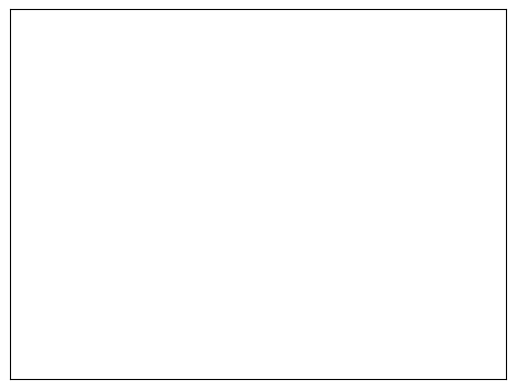

In [36]:
annihilate_erase_erase(inet)
inet_draw(inet)